Dataset Used - https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data

In [4]:
install.packages("caret")


Installing package into 'C:/Users/ATHARVA/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependencies 'listenv', 'parallelly', 'future', 'globals', 'shape', 'future.apply', 'numDeriv', 'progressr', 'SQUAREM', 'diagram', 'lava', 'prodlim', 'proxy', 'iterators', 'clock', 'gower', 'hardhat', 'ipred', 'timeDate', 'e1071', 'foreach', 'ModelMetrics', 'pROC', 'recipes', 'reshape2'




package 'listenv' successfully unpacked and MD5 sums checked
package 'parallelly' successfully unpacked and MD5 sums checked
package 'future' successfully unpacked and MD5 sums checked
package 'globals' successfully unpacked and MD5 sums checked
package 'shape' successfully unpacked and MD5 sums checked
package 'future.apply' successfully unpacked and MD5 sums checked
package 'numDeriv' successfully unpacked and MD5 sums checked
package 'progressr' successfully unpacked and MD5 sums checked
package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'diagram' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'prodlim' successfully unpacked and MD5 sums checked
package 'proxy' successfully unpacked and MD5 sums checked
package 'iterators' successfully unpacked and MD5 sums checked
package 'clock' successfully unpacked and MD5 sums checked
package 'gower' successfully unpacked and MD5 sums checked
package 'hardhat' succe

In [5]:
# Load necessary libraries
library(ggplot2)
library(caret)

Loading required package: lattice



In [13]:
# Load the dataset
car_data <- read.csv("Datasets/Car_prices.csv")

# Check the structure of the dataset
str(car_data)

'data.frame':	205 obs. of  26 variables:
 $ car_ID          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ symboling       : int  3 3 1 2 2 2 1 1 1 0 ...
 $ CarName         : chr  "alfa-romero giulia" "alfa-romero stelvio" "alfa-romero Quadrifoglio" "audi 100 ls" ...
 $ fueltype        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration      : chr  "std" "std" "std" "std" ...
 $ doornumber      : chr  "two" "two" "two" "four" ...
 $ carbody         : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drivewheel      : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ enginelocation  : chr  "front" "front" "front" "front" ...
 $ wheelbase       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ carlength       : num  169 169 171 177 177 ...
 $ carwidth        : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ carheight       : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curbweight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ enginetype      : chr  "dohc" "dohc" "ohc

In [14]:
# Keep only the required columns
car_data <- car_data[, c("carwidth", "cylindernumber", "enginesize", "boreratio", "horsepower", "highwaympg", "price")]

# Check the structure of the modified dataset
str(car_data)

'data.frame':	205 obs. of  7 variables:
 $ carwidth      : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ cylindernumber: chr  "four" "four" "six" "four" ...
 $ enginesize    : int  130 130 152 109 136 136 136 136 131 131 ...
 $ boreratio     : num  3.47 3.47 2.68 3.19 3.19 3.19 3.19 3.19 3.13 3.13 ...
 $ horsepower    : int  111 111 154 102 115 110 110 110 140 160 ...
 $ highwaympg    : int  27 27 26 30 22 25 25 25 20 22 ...
 $ price         : num  13495 16500 16500 13950 17450 ...


In [15]:
unique_values <- unique(car_data$cylindernumber)
print(unique_values)

[1] "four"   "six"    "five"   "three"  "twelve" "two"    "eight" 


In [16]:
# Create a mapping for string values to numeric values
mapping <- c("four" = 4, "six" = 6, "five" = 5, "three" = 3, "twelve" = 12, "two" = 2, "eight" = 8)

# Replace string values with numeric values
car_data$cylindernumber <- mapping[as.character(car_data$cylindernumber)]

str(car_data)

'data.frame':	205 obs. of  7 variables:
 $ carwidth      : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ cylindernumber: num  4 4 6 4 5 5 5 5 5 5 ...
 $ enginesize    : int  130 130 152 109 136 136 136 136 131 131 ...
 $ boreratio     : num  3.47 3.47 2.68 3.19 3.19 3.19 3.19 3.19 3.13 3.13 ...
 $ horsepower    : int  111 111 154 102 115 110 110 110 140 160 ...
 $ highwaympg    : int  27 27 26 30 22 25 25 25 20 22 ...
 $ price         : num  13495 16500 16500 13950 17450 ...


In [17]:
# Summary statistics
summary(car_data)

    carwidth     cylindernumber    enginesize      boreratio      horsepower   
 Min.   :60.30   Min.   : 2.00   Min.   : 61.0   Min.   :2.54   Min.   : 48.0  
 1st Qu.:64.10   1st Qu.: 4.00   1st Qu.: 97.0   1st Qu.:3.15   1st Qu.: 70.0  
 Median :65.50   Median : 4.00   Median :120.0   Median :3.31   Median : 95.0  
 Mean   :65.91   Mean   : 4.38   Mean   :126.9   Mean   :3.33   Mean   :104.1  
 3rd Qu.:66.90   3rd Qu.: 4.00   3rd Qu.:141.0   3rd Qu.:3.58   3rd Qu.:116.0  
 Max.   :72.30   Max.   :12.00   Max.   :326.0   Max.   :3.94   Max.   :288.0  
   highwaympg        price      
 Min.   :16.00   Min.   : 5118  
 1st Qu.:25.00   1st Qu.: 7788  
 Median :30.00   Median :10295  
 Mean   :30.75   Mean   :13277  
 3rd Qu.:34.00   3rd Qu.:16503  
 Max.   :54.00   Max.   :45400  

In [18]:
# Split the data into training and testing sets (80% train, 20% test)
set.seed(123)
train_index <- createDataPartition(car_data$price, p = 0.8, list = FALSE)
train_data <- car_data[train_index, ]
test_data <- car_data[-train_index, ]

In [19]:
# Train the linear regression model
lm_model <- lm(price ~ ., data = train_data)

# Summarize the model
summary(lm_model)


Call:
lm(formula = price ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8278.2 -1989.5    15.9  1220.2 14756.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -52851.10   14464.91  -3.654 0.000351 ***
carwidth          831.75     212.56   3.913 0.000135 ***
cylindernumber    -97.89     594.84  -0.165 0.869500    
enginesize        108.51      19.62   5.532 1.29e-07 ***
boreratio       -1346.27    1603.88  -0.839 0.402521    
horsepower         37.54      14.27   2.631 0.009365 ** 
highwaympg        -50.80      70.24  -0.723 0.470581    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3455 on 158 degrees of freedom
Multiple R-squared:  0.8233,	Adjusted R-squared:  0.8166 
F-statistic: 122.7 on 6 and 158 DF,  p-value: < 2.2e-16


In [20]:
# Make predictions on the testing set
predictions <- predict(lm_model, newdata = test_data)

# Calculate the root mean squared error (RMSE)
rmse <- sqrt(mean((test_data$price - predictions)^2))
print(paste("RMSE:", rmse))

[1] "RMSE: 3574.35143673488"


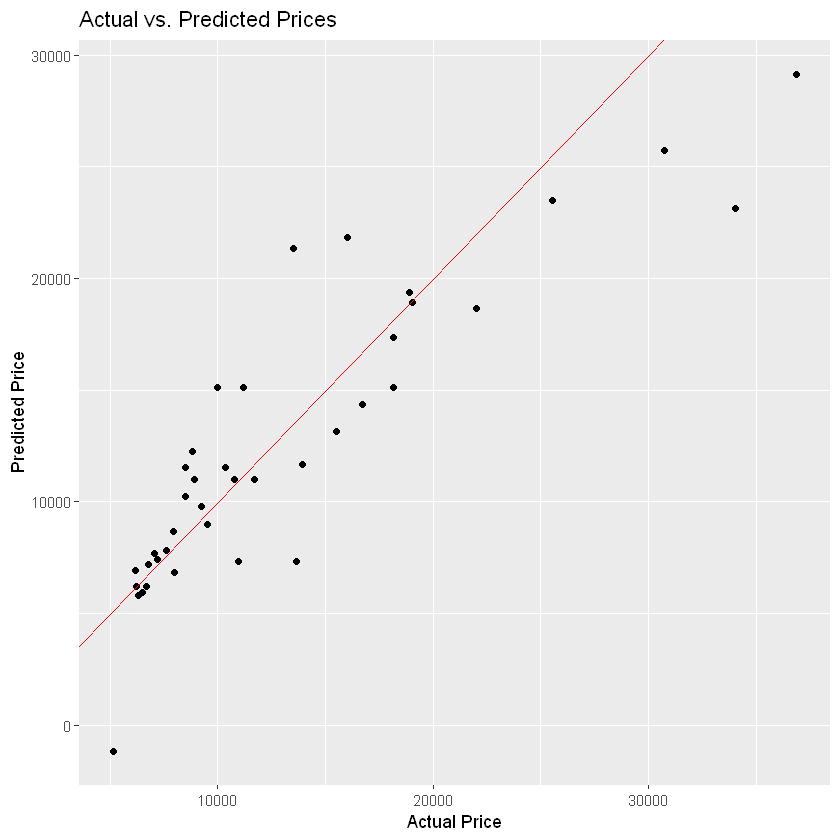

In [21]:
# Plotting actual vs. predicted values
ggplot(test_data, aes(x = price, y = predictions)) +
  geom_point() +
  geom_abline(color = "red") +
  labs(x = "Actual Price", y = "Predicted Price", title = "Actual vs. Predicted Prices")